## Regresão Logística

##### Feito com base em um data frame contendo notas e se determinado aluno foi aprovado ou não

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv('notas.csv')

notas = pd.read_csv('https://raw.githubusercontent.com/celsocrivelaro/simple-datasets/main/notas-estudantes.csv')
#notas = notas.to_csv('notas.csv')

### Armazenando colunas de notas em array para usar posteriormente esses sao os x1 e x2 da sigmoide

In [2]:

notas1 = notas.nota_1
notas2 = notas.nota_2
results = notas.resultado

### Plotagem dos Dados

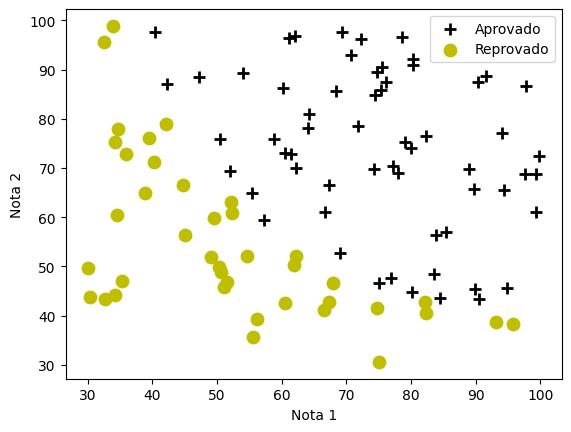

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (notas['resultado'] == 0)
    pos = (notas['resultado'] == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='k', s=80, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='y', s=80, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)

plotData(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')

### Função sigmoidal usada para prever os valores de Y

$$f(x) = \frac{1}{1+e^{-(ax_1+bx_2+c))}}$$

In [4]:

def sigmoide(x1,x2,a,b,c):
  sig =  1.0 / (1 + (np.exp(-(a*x1+b*x2 +c))))
  return sig

### Função de entropia cruzada usada para calcular as perdas logísticas
$$ 
L = -\frac{1}{N}(\sum  y\log{p(x)} + (1-y)\log {(1-p(x)})$$

In [5]:
def crossEntropy(N, sig, y):
    logLoss =  -(np.sum(y*np.log(sig) + (1-y)*np.log(1-sig)))
    return logLoss/N


### Função Classificatória a partir da descida do gradiente
##### Método que usa derivadas parciais para recalcular os coeficientes usado na predição do nosso dado
$$\frac{\partial L}{\partial a} = \frac{1}{N} X_1(p(X) -Y)$$
$$\frac{\partial L}{\partial b} = \frac{1}{N} X_2(p(X) -Y)$$ 
$$   \frac{\partial L}{\partial c} = \frac{1}{N} (p(X) -Y)$$

#### Os coeficientes $a, b$ e $c$ são recalculados como nessa equeção: $a =  a - \alpha * \frac{\partial L}{\partial a}$ para $b$ e $c$  só substituimos no lugar de $a$ e utilizamos suas respectivas derivadas parciais

In [6]:
# Método de aprendizado Gradient Descent
# Hiperparâmetros iteracoes, alfa, limite_parada/epsilon
def gradDescent(x1, x2, y, iteraçoes = 10000, alfa = 1e-6, epsilon = 1e-6):
    count = 0
    a = 0.01
    b = 0.01
    c = 3
    n = len(y)

    perdas = []
    perdasm = []
    var_a = []
    var_b = []
    perda_anterior = float('inf')
    for i in range(iteraçoes):    
        #prediçao do dado com coeficientes atuais
        sig = sigmoide(x1, x2, a, b, c)
        #calculo de erros/perdas
        loss = crossEntropy(n, sig, y)
        count += 1
        if abs(perda_anterior - loss) <= epsilon:
            print(f"Coeficientes encontrados após {count} iterações eps")
            return a, b, c, perdas, var_a, var_b,  count
		
        perda_anterior = loss

        perdas.append(loss)
        perdasm.append(loss/n)
        var_a.append(a)
        var_b.append(b)
        
        #gradiente
        derivada_a = (1/n) * np.sum(x1 * (sig - y))
        derivada_b = (1/n) * np.sum(x2 * (sig - y))
        derivada_c = (1/n) * np.sum(sig - y)
        
        #atualizaçao dos coeficientes
        a = a - (alfa * derivada_a)
        b = b - (alfa * derivada_b)
        c = c - (alfa * derivada_c)
    
    print(f"Coeficientes encontrados após {count} iterações")
    return a, b, c, perdas, var_a, var_b,  count


### Coeficientes encontrados a partir da classificatoria utilizando a descida do gradiente

In [7]:
perdas, var_a, var_b= [], [], []
a, b, c, perdas, var_a, var_b,  iters = gradDescent(notas1, notas2, results)

a,b,c

Coeficientes encontrados após 2815 iterações eps


(-0.014693399987864989, -0.017218703672776607, 2.999366893317438)

## Plotagem

Text(0.5, 0, 'Perdas')

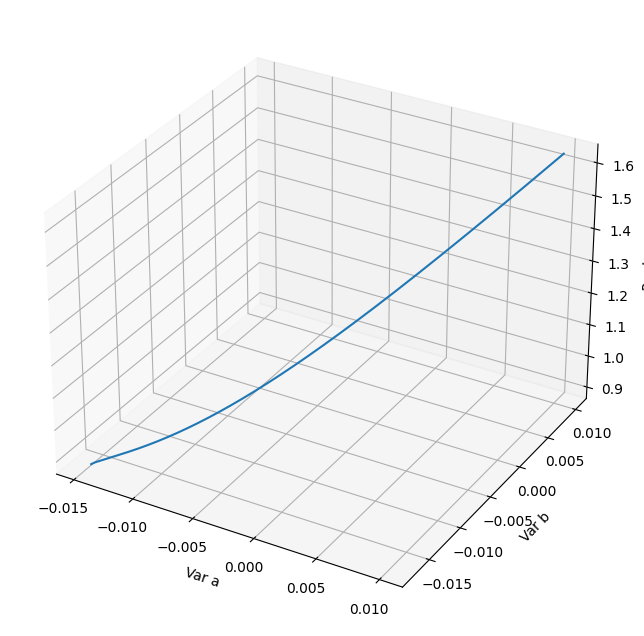

In [8]:
# Plotando os valores de A , B e a perda
plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')
ax.plot3D(var_a, var_b, perdas)
ax.set_xlabel("Var a")
ax.set_ylabel("Var b")
ax.set_zlabel("Perdas")

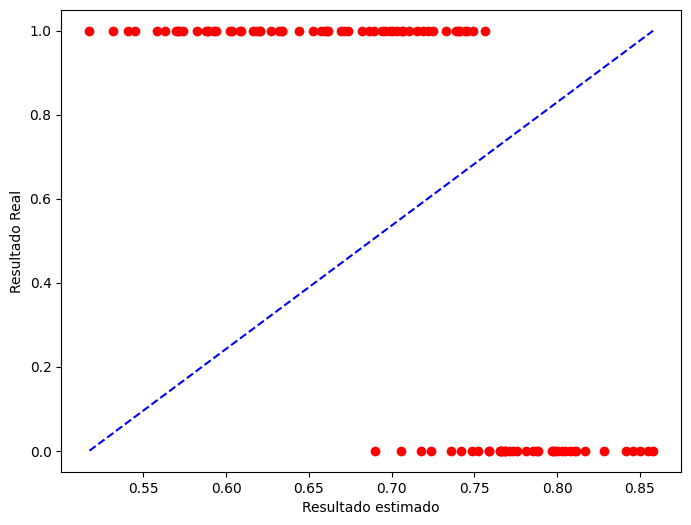

In [9]:
Y_pred = sigmoide(notas1, notas2, a, b, c)

# Plotando os mesmos dados com a linha
plt.figure(figsize = (8,6))
plt.scatter(Y_pred, results, marker='o', color='red')
plt.plot([min(Y_pred), max(Y_pred)], [min(results), max(results)], color='blue',markerfacecolor='red', markersize=10,linestyle='dashed')
plt.xlabel("Resultado estimado")
plt.ylabel("Resultado Real")
plt.show()

### A partir do gráfico dos resultados estimados e reais podemos pegar o valor "central" determinando que os resultados estimados que sejam maior que esse "centro" são considerados como 0 ou seja são reprovados e os menores como 1 ou seja são aprovados

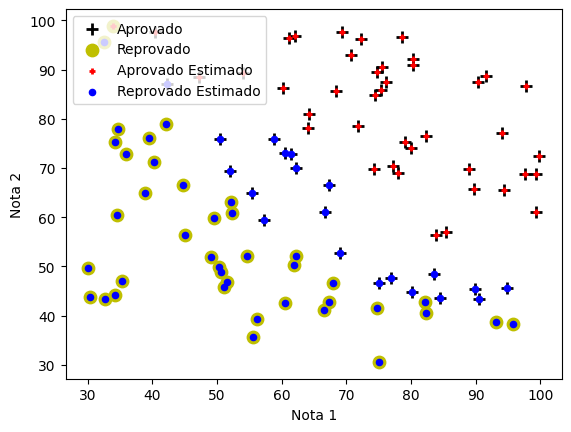

In [10]:
resultadoSigmoidal = np.where(Y_pred < 0.69, 1, 0)

def plotDataSig(data, label_x, label_y, label_pos, label_neg, axes=None):
    neg = (resultadoSigmoidal == 0)
    pos = (resultadoSigmoidal == 1)
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][["nota_1"]], data[pos][["nota_2"]], marker='+', c='r', s=20, linewidth=2, label=label_pos)
    axes.scatter(data[neg][["nota_1"]], data[neg][["nota_2"]], c='b', s=20, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)


plotData(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')
plotDataSig(notas, 'Nota 1', 'Nota 2', 'Aprovado Estimado', 'Reprovado Estimado')


/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Coeficientes encontrados após 58908 iterações eps


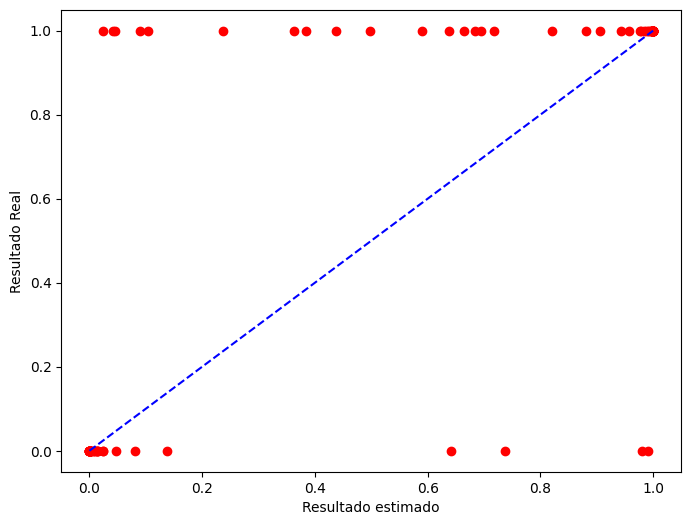

In [11]:
a3, b3, c3, perdas, var_a, var_b,  iters = gradDescent(notas1, notas2, results,iteraçoes= 100000,alfa= 0.01, epsilon=1e-4)

Y_pred3 = sigmoide(notas1, notas2, a3, b3, c3)

# Plotando os mesmos dados com a linha
plt.figure(figsize = (8,6))
plt.scatter(Y_pred3, results, marker='o', color='red')
plt.plot([min(Y_pred3), max(Y_pred3)], [min(results), max(results)], color='blue',markerfacecolor='red', markersize=10,linestyle='dashed')
plt.xlabel("Resultado estimado")
plt.ylabel("Resultado Real")
plt.show()

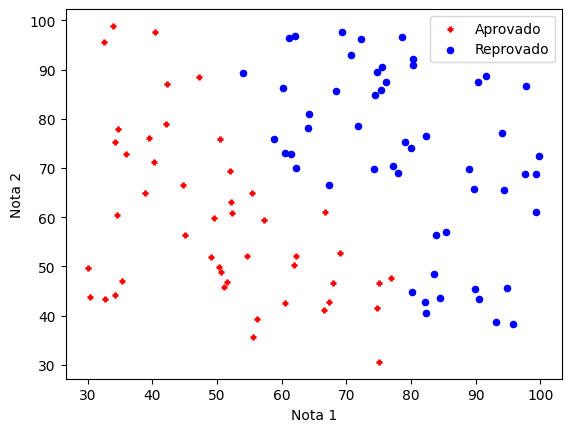

In [12]:

resultadoSigmoidal = np.where(Y_pred3 < 0.6, 1, 0)

plotDataSig(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')

Coeficientes encontrados após 78 iterações eps


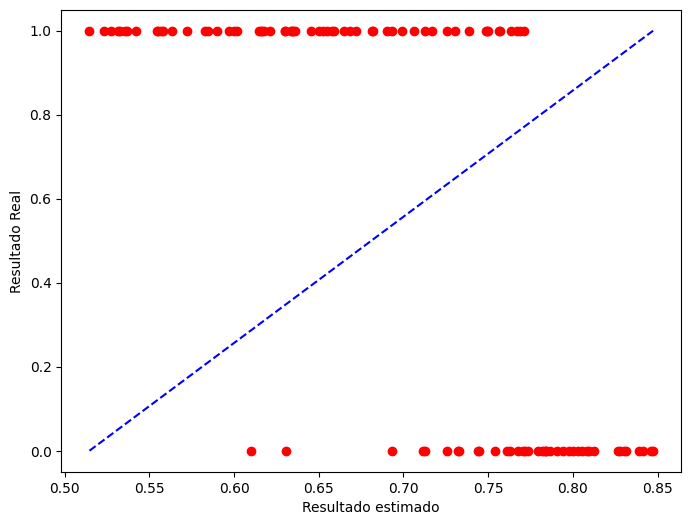

In [13]:
a4, b4, c4, perdas, var_a, var_b,  iters = gradDescent(notas1, notas2, results, alfa= 0.001, epsilon=1e-5)

Y_pred4 = sigmoide(notas1, notas2, a4, b4, c4)

# Plotando os mesmos dados com a linha
plt.figure(figsize = (8,6))
plt.scatter(Y_pred4, results, marker='o', color='red')
plt.plot([min(Y_pred4), max(Y_pred4)], [min(results), max(results)], color='blue',markerfacecolor='red', markersize=10,linestyle='dashed')
plt.xlabel("Resultado estimado")
plt.ylabel("Resultado Real")
plt.show()

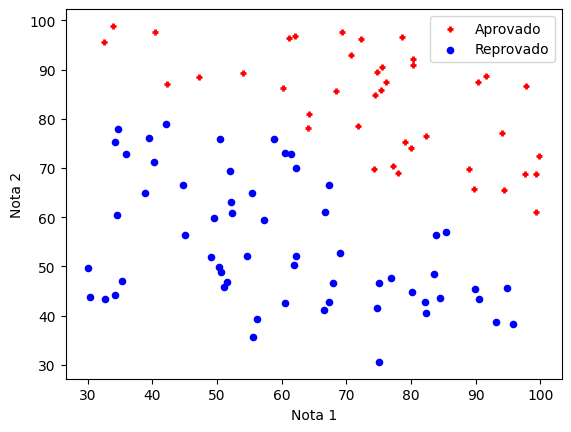

In [14]:
resultadoSigmoidal = np.where(Y_pred4 < 0.67, 1, 0)

plotDataSig(notas, 'Nota 1', 'Nota 2', 'Aprovado', 'Reprovado')